<a href="https://colab.research.google.com/github/Yamini-26/DL_assignment1/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References: https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/#general-comments-on-fnns

In [1]:
!pip install torch torchvision numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.7 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [3]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 120976734.00it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33481396.86it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32099304.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5617967.79it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [10]:
batch_size = 100
n_iters = 60000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [11]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [12]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [13]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
import numpy as np

iter = 0
train_loss_values = []
test_loss_values = []
for epoch in range(num_epochs):
    batchlosses = np.array([], dtype=float)
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        batchlosses = np.append(batchlosses, loss.item())

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

    train_loss_values.append(np.mean(batchlosses))
    # Calculate Accuracy
    correct = 0
    total = 0
    # Iterate through test dataset
    batchlosses = np.array([], dtype=float)
    for images, labels in test_loader:

        images = images.view(-1, 28*28).requires_grad_().to(device)

        # Forward pass only to get logits/output
        outputs = model(images)
        loss = criterion(outputs, labels)
        batchlosses = np.append(batchlosses, loss.item())

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)

        # Total number of labels
        total += labels.size(0)

        # Total correct predictions
        if torch.cuda.is_available():
            correct += (predicted.cpu() == labels.cpu()).sum()
        else:
            correct += (predicted == labels).sum()

    accuracy = 100 * correct / total

    # Print Loss
    print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
    test_loss_values.append(np.mean(batchlosses))

Iteration: 600. Loss: 0.41299083828926086. Accuracy: 91.68000030517578
Iteration: 1200. Loss: 0.249115988612175. Accuracy: 95.08999633789062
Iteration: 1800. Loss: 0.1571108102798462. Accuracy: 95.66999816894531
Iteration: 2400. Loss: 0.12723225355148315. Accuracy: 96.55000305175781
Iteration: 3000. Loss: 0.13179361820220947. Accuracy: 96.5
Iteration: 3600. Loss: 0.10898075997829437. Accuracy: 96.87999725341797
Iteration: 4200. Loss: 0.13568715751171112. Accuracy: 96.91999816894531
Iteration: 4800. Loss: 0.08525598794221878. Accuracy: 97.45999908447266
Iteration: 5400. Loss: 0.1200888529419899. Accuracy: 97.1500015258789
Iteration: 6000. Loss: 0.07064777612686157. Accuracy: 97.44000244140625
Iteration: 6600. Loss: 0.07223082333803177. Accuracy: 97.66999816894531
Iteration: 7200. Loss: 0.0755411684513092. Accuracy: 97.5199966430664
Iteration: 7800. Loss: 0.060966383665800095. Accuracy: 97.02999877929688
Iteration: 8400. Loss: 0.019764458760619164. Accuracy: 97.58000183105469
Iteration: 

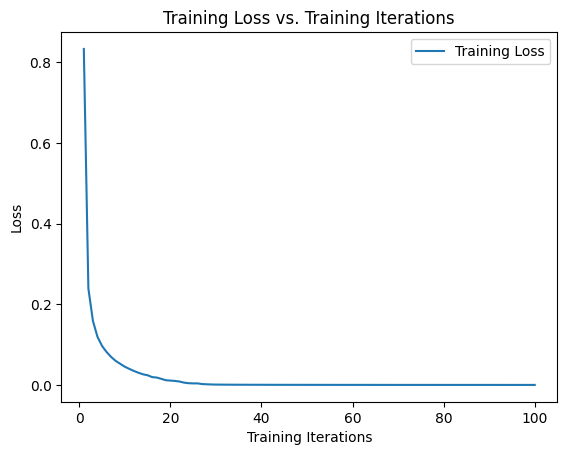

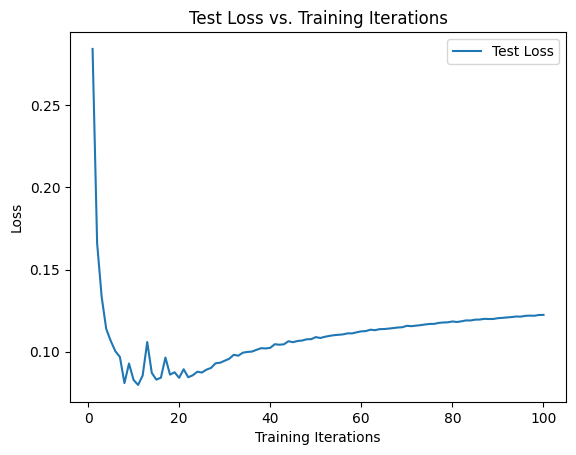

In [15]:
import matplotlib.pyplot as plt

# Plotting the training loss vs. training iterations
plt.plot(range(1, len(train_loss_values) + 1), train_loss_values, label='Training Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.title('Training Loss vs. Training Iterations')
plt.legend()
plt.show()

# Plotting the test loss vs. training iterations
plt.plot(range(1, len(test_loss_values) + 1), test_loss_values, label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.title('Test Loss vs. Training Iterations')
plt.legend()
plt.show()


From the graph it can be inferred that model exhibits overfitting for ecphos over 30, hence increasing the test error.